Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.7148 - accuracy: 0.5000 - val_loss: 0.6995 - val_accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 90ms/step - loss: 0.7237 - accuracy: 0.4375 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 77ms/step - loss: 0.6765 - accuracy: 0.6250 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 82ms/step - loss: 0.6292 - accuracy: 0.6875 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 71ms/step - loss: 0.6689 - accuracy: 0.6250 - val_loss: 0.7035 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 71ms/step - loss: 0.6864 - accuracy: 0.5000 - val_loss: 0.7040 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 70ms/step - loss: 0.6833 - accuracy: 0.4375 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=============

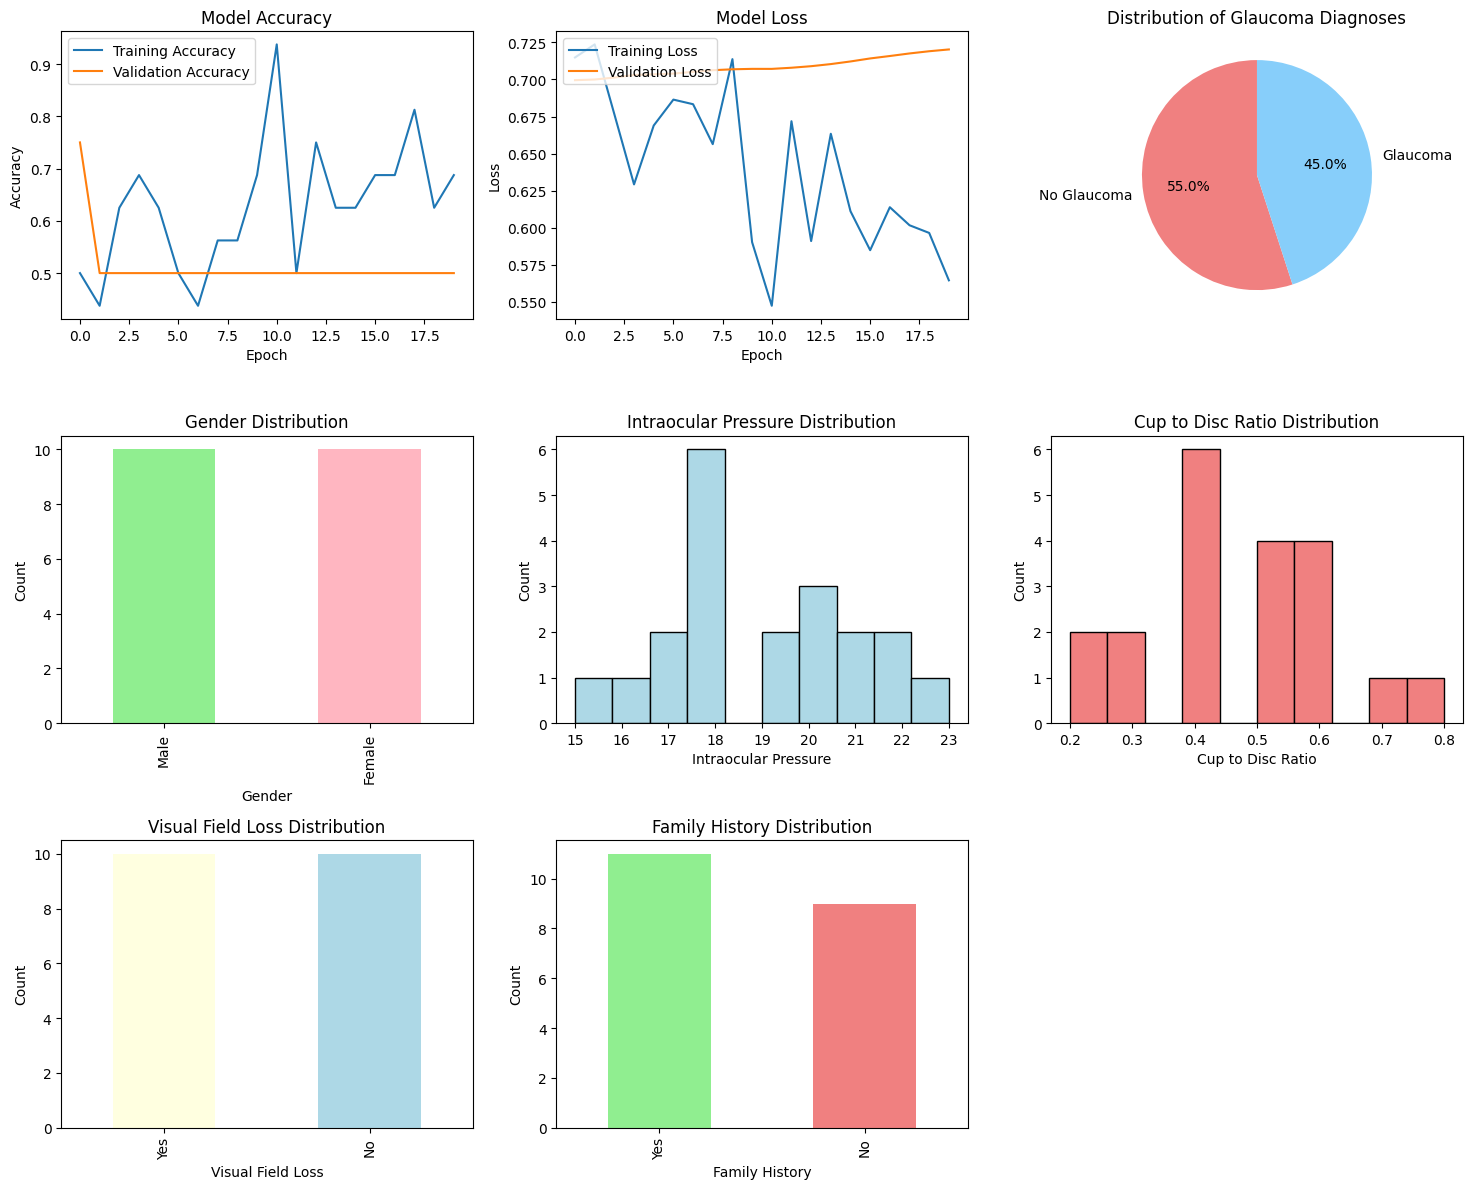

1/1 [==============================] - 0s 175ms/step
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a DataFrame to store the data
data = pd.DataFrame({
    "Patient_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Age": [55, 62, 48, 70, 58, 42, 65, 50, 60, 45, 47, 53, 66, 80, 76, 74, 52, 66, 81, 43],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Intraocular_Pressure": [18, 21, 16, 22, 20, 15, 23, 17, 18, 18, 20, 19, 18, 17, 18, 18, 22, 20, 21, 19],
    "Cup_To_Disc_Ratio": [0.4, 0.6, 0.3, 0.7, 0.5, 0.2, 0.8, 0.4, 0.4, 0.4, 0.5, 0.4, 0.4, 0.6, 0.3, 0.2, 0.5, 0.6, 0.5, 0.6],
    "Visual_Field_Loss": ["Yes", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No"],
    "Family_History": ["No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "No", "No", "Yes", "Yes"],
    "Glaucoma_Diagnosis": [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
})

# Save the DataFrame to a CSV file
data.to_csv('glaucoma_patients.csv', index=False)

# Load the dataset from the CSV file
data = pd.read_csv('glaucoma_patients.csv')

# Separate features (X) and labels (y)
X = data.drop('Glaucoma_Diagnosis', axis=1)
y = data['Glaucoma_Diagnosis']

# Define transformers for numerical and categorical columns
numeric_features = ['Age', 'Intraocular_Pressure', 'Cup_To_Disc_Ratio']
categorical_features = ['Gender', 'Visual_Field_Loss', 'Family_History']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the features using the preprocessor
X_preprocessed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Create the final model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_preprocessed.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data and record the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training history (loss and accuracy over epochs)
plt.figure(figsize=(15, 12))

# Plot training & validation accuracy values
plt.subplot(3, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(3, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Plot Pie Chart for the distribution of glaucoma diagnoses
plt.subplot(3, 3, 3)
labels = ['No Glaucoma', 'Glaucoma']
sizes = data['Glaucoma_Diagnosis'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Glaucoma Diagnoses')

# Bar chart for Gender distribution
plt.subplot(3, 3, 4)
gender_counts = data['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['lightgreen', 'lightpink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Histogram for Intraocular Pressure
plt.subplot(3, 3, 5)
plt.hist(data['Intraocular_Pressure'], bins=10, color='lightblue', edgecolor='black')
plt.title('Intraocular Pressure Distribution')
plt.xlabel('Intraocular Pressure')
plt.ylabel('Count')

# Histogram for Cup to Disc Ratio
plt.subplot(3, 3, 6)
plt.hist(data['Cup_To_Disc_Ratio'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Cup to Disc Ratio Distribution')
plt.xlabel('Cup to Disc Ratio')
plt.ylabel('Count')

# Bar chart for Visual Field Loss distribution
plt.subplot(3, 3, 7)
visual_field_counts = data['Visual_Field_Loss'].value_counts()
visual_field_counts.plot(kind='bar', color=['lightyellow', 'lightblue'])
plt.title('Visual Field Loss Distribution')
plt.xlabel('Visual Field Loss')
plt.ylabel('Count')

# Bar chart for Family History distribution
plt.subplot(3, 3, 8)
family_history_counts = data['Family_History'].value_counts()
family_history_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Family History Distribution')
plt.xlabel('Family History')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))